In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch.nn as nn
from torch import optim 
from torchviz import make_dot


In [22]:
# matplotlibの初期設定
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['font.size'] = 14

In [19]:
# データ準備

iris = load_iris()
X = iris.data
y = iris.target

# Xデータを２特徴量に絞る
X_select = X[:, [0, 2]]

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.5, random_state=123)


(75, 2) (75, 2) (75,) (75,)


Text(0, 0.5, 'petal_length')

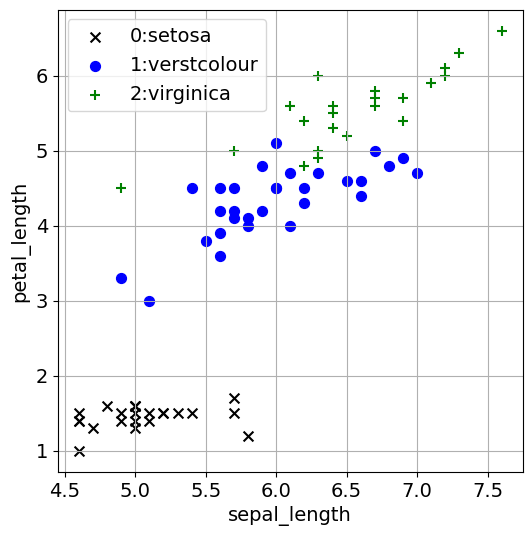

In [33]:
# データの描写

# 各ラベルに対応したデータの抽出
X_l0 = X_train[y_train == 0]
X_l1 = X_train[y_train == 1]
X_l2 = X_train[y_train == 2]


plt.scatter(X_l0[:, 0], X_l0[:, 1], marker='x', color='k', s=50, label='0:setosa')
plt.scatter(X_l1[:, 0], X_l1[:, 1], marker='o', color='b', s=50, label='1:verstcolour')
plt.scatter(X_l2[:, 0], X_l2[:, 1], marker='+', color='g', s=50, label='2:virginica')
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')



In [91]:
# モデルの定義

# inputとoutputの次元
n_input = X_select.shape[1]
n_output = len(set(y))


class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)


        # パラメータの初期値を1に設定
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)


    def forward(self, X):
        x1 = self.l1(X)
        return x1


# インスタンス生成
net = Net(n_input, n_output)

# loss
criterion = nn.CrossEntropyLoss()

# optimizer
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)
        

In [81]:
# 処理

inputs = torch.tensor(X_train).float()
labels = torch.tensor(y_train).long() # crossentropyに渡すのは整数

inputs_test = torch.tensor(X_test).float()
labels_test = torch.tensor(y_test).long() # crossentropyに渡すのは整数


outputs = net(inputs)

loss = criterion(outputs, labels)



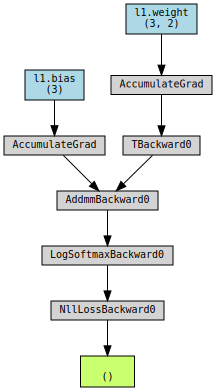

In [85]:
# 計算クラフの表示
make_dot(loss, dict(net.named_parameters()))

In [90]:
# outputsの予測ラベル

torch.max(outputs, axis=1).indices

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [97]:
# 繰り返し処理

num_epochs = 10000
history = np.zeros((0, 5))

for epoch in range(num_epochs):

    # 勾配初期化
    optimizer.zero_grad()

    # 予測関数
    outputs = net(inputs)

    # 損失
    loss = criterion(outputs, labels)

    # 勾配計算
    loss.backward()

    # パラメータの更新
    optimizer.step()

    # 予測ラベル
    pred = torch.max(outputs, axis=1)[1]

    # 損失と精度
    train_loss = loss.item()
    train_acc = (pred == labels).sum() / len(labels)

    
    #---- val -----

    # testの予測
    outputs_test = net(inputs_test)

    # loss
    loss_test = criterion(outputs_test, labels_test)

    # 予測ラベル
    pred_test = torch.max(outputs_test, 1)[1]

    # 損失と精度
    val_loss = loss_test.item()
    val_acc = (pred_test == labels_test).sum() / len(labels_test)


    # -----　表示 --------
    if epoch % 10 == 0:
        print(f"epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}")
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))
    

epoch [0/10000], loss: 1.08564, acc: 0.40000, val_loss: 1.08839, val_acc: 0.26667
epoch [10/10000], loss: 1.03241, acc: 0.40000, val_loss: 1.06115, val_acc: 0.26667
epoch [20/10000], loss: 1.00187, acc: 0.40000, val_loss: 1.03034, val_acc: 0.26667
epoch [30/10000], loss: 0.97402, acc: 0.40000, val_loss: 0.99965, val_acc: 0.26667
epoch [40/10000], loss: 0.94805, acc: 0.42667, val_loss: 0.97070, val_acc: 0.26667
epoch [50/10000], loss: 0.92381, acc: 0.52000, val_loss: 0.94369, val_acc: 0.41333
epoch [60/10000], loss: 0.90119, acc: 0.69333, val_loss: 0.91854, val_acc: 0.58667
epoch [70/10000], loss: 0.88007, acc: 0.70667, val_loss: 0.89514, val_acc: 0.60000
epoch [80/10000], loss: 0.86036, acc: 0.70667, val_loss: 0.87334, val_acc: 0.61333
epoch [90/10000], loss: 0.84194, acc: 0.70667, val_loss: 0.85304, val_acc: 0.62667
epoch [100/10000], loss: 0.82473, acc: 0.70667, val_loss: 0.83411, val_acc: 0.62667
epoch [110/10000], loss: 0.80862, acc: 0.72000, val_loss: 0.81644, val_acc: 0.62667
epo

In [101]:
print(f'初期: 損失：{history[0, 3]:.5f}, 精度: {history[0, 4]:.5f}')
print(f'最後: 損失：{history[-1, 3]:.5f}, 精度: {history[-1, 4]:.5f}')


初期: 損失：1.08839, 精度: 0.26667
最後: 損失：0.19794, 精度: 0.96000


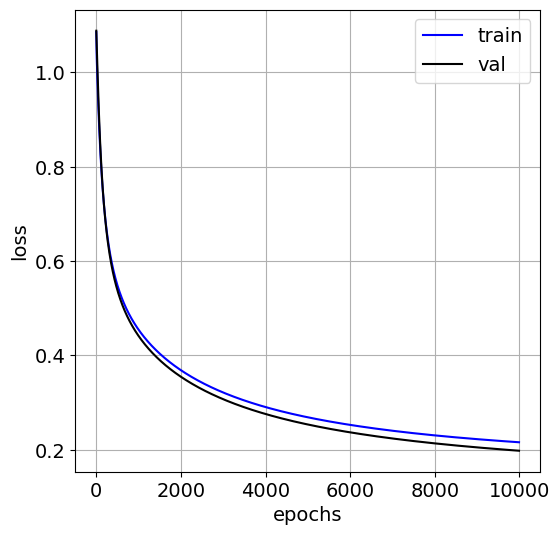

In [102]:
# 損失の学習曲線
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


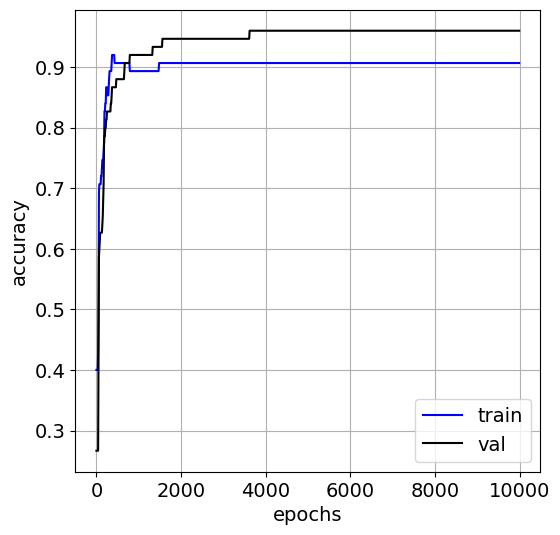

In [103]:
# 損失の学習曲線
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'k', label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


In [114]:
i3 = inputs[[0,2,3], :]

# i3のnet出力をsoftmax関数に通す
o3 = net(i3)
softmax = nn.Softmax(dim=1)
k3 = softmax(o3)

print(o3.data.numpy())
print(k3.data.numpy())

[[ 8.806983   14.193814   12.998584  ]
 [12.8264265   9.800109    0.17312953]
 [ 6.7952228  15.09285    17.111238  ]]
[[3.50092934e-03 7.64987648e-01 2.31511414e-01]
 [9.53746080e-01 4.62508537e-02 3.04912692e-06]
 [2.92158784e-05 1.17282264e-01 8.82688463e-01]]


In [120]:
print(np.argmax(o3.data.numpy(), axis=1))
print(np.argmax(k3.data.numpy(), axis=1))

[1 0 2]
[1 0 2]


In [121]:
a = np.exp(10)

In [123]:
np.log(a)

10.0

In [127]:
# 最終的なweight, bias
print(net.l1.weight.data)
print(net.l1.bias.data)

tensor([[ 3.0453, -2.5737],
        [ 1.3574,  0.8481],
        [-1.4027,  4.7255]])
tensor([ 1.7178,  1.6564, -0.3742])


In [141]:
# 入力の4次元化

# 繰り返し処理

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

inputs = torch.tensor(X_train).float()
labels = torch.tensor(y_train).long() # crossentropyに渡すのは整数

inputs_test = torch.tensor(X_test).float()
labels_test = torch.tensor(y_test).long() # crossentropyに渡すのは整数


num_epochs = 10000
history = np.zeros((0, 5))


n_input = X_train.shape[1]

net = Net(n_input, n_output)

# criterion = nn.CrossEntropyLoss()

# optimizer
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)


for epoch in range(num_epochs):

    # 勾配初期化
    optimizer.zero_grad()

    # 予測関数
    outputs = net(inputs)

    # 損失
    loss = criterion(outputs, labels)

    # 勾配計算
    loss.backward()

    # パラメータの更新
    optimizer.step()

    # 予測ラベル
    pred = torch.max(outputs, axis=1)[1]

    # 損失と精度
    train_loss = loss.item()
    train_acc = (pred == labels).sum() / len(labels)

    
    #---- val -----

    # testの予測
    outputs_test = net(inputs_test)

    # loss
    loss_test = criterion(outputs_test, labels_test)

    # 予測ラベル
    pred_test = torch.max(outputs_test, 1)[1]

    # 損失と精度
    val_loss = loss_test.item()
    val_acc = (pred_test == labels_test).sum() / len(labels_test)


    # -----　表示 --------
    if epoch % 10 == 0:
        print(f"epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}")
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))
    

epoch [0/10000], loss: 1.09861, acc: 0.30667, val_loss: 1.09158, val_acc: 0.26667
epoch [10/10000], loss: 1.01848, acc: 0.40000, val_loss: 1.04171, val_acc: 0.26667
epoch [20/10000], loss: 0.96854, acc: 0.40000, val_loss: 0.98850, val_acc: 0.26667
epoch [30/10000], loss: 0.92459, acc: 0.65333, val_loss: 0.93996, val_acc: 0.57333
epoch [40/10000], loss: 0.88568, acc: 0.70667, val_loss: 0.89704, val_acc: 0.62667
epoch [50/10000], loss: 0.85120, acc: 0.70667, val_loss: 0.85918, val_acc: 0.62667
epoch [60/10000], loss: 0.82059, acc: 0.70667, val_loss: 0.82572, val_acc: 0.62667
epoch [70/10000], loss: 0.79335, acc: 0.72000, val_loss: 0.79607, val_acc: 0.62667
epoch [80/10000], loss: 0.76900, acc: 0.72000, val_loss: 0.76968, val_acc: 0.65333
epoch [90/10000], loss: 0.74717, acc: 0.72000, val_loss: 0.74610, val_acc: 0.65333
epoch [100/10000], loss: 0.72750, acc: 0.76000, val_loss: 0.72494, val_acc: 0.69333
epoch [110/10000], loss: 0.70970, acc: 0.77333, val_loss: 0.70585, val_acc: 0.74667
epo

In [142]:
print(f'初期: 損失：{history[0, 3]:.5f}, 精度: {history[0, 4]:.5f}')
print(f'最後: 損失：{history[-1, 3]:.5f}, 精度: {history[-1, 4]:.5f}')

初期: 損失：1.09158, 精度: 0.26667
最後: 損失：0.13724, 精度: 0.96000


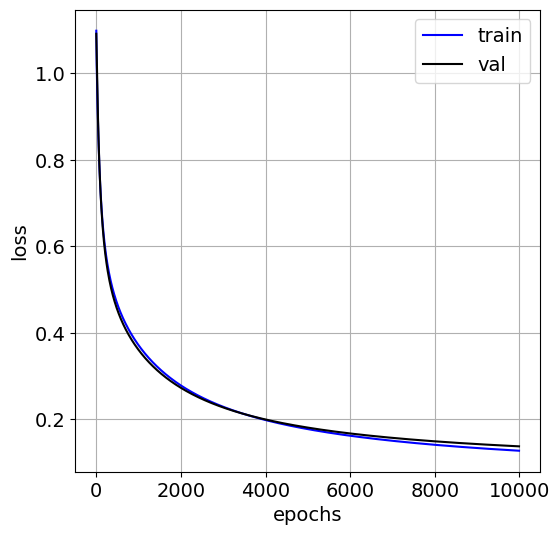

In [143]:
# 損失の学習曲線
plt.plot(history[:, 0], history[:, 1], 'b', label='train')
plt.plot(history[:, 0], history[:, 3], 'k', label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


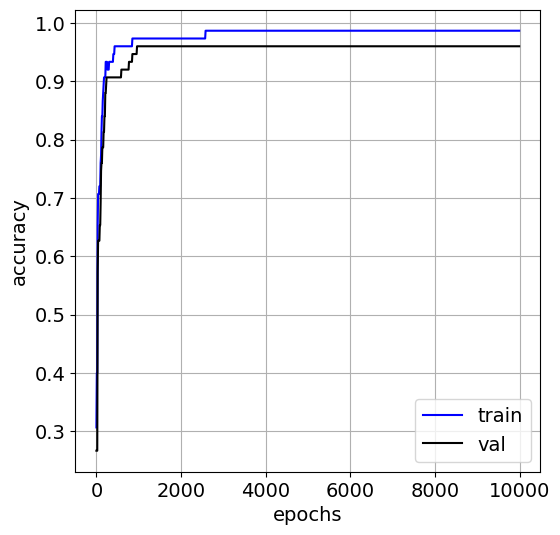

In [144]:
# 損失の学習曲線
plt.plot(history[:, 0], history[:, 2], 'b', label='train')
plt.plot(history[:, 0], history[:, 4], 'k', label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()